# Ⅰ. 서울시내 따릉이 대여소 분석

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso

import warnings
warnings.filterwarnings('ignore')

geo_path = 'C:/Users/psuny/Desktop/대학원/데이터/따릉이 데이터/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
rental = pd.read_csv('C:/Users/psuny/Desktop/대학원/데이터/따릉이 데이터/원본 데이터/공공자전거 대여소 정보/공공자전거 대여소 정보(21.06월 기준).csv', engine = 'python')
rental.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD


In [3]:
# rental.to_excel('./공공자전거 대여소 정보(21.06월 기준).xlsx', index = False)

In [4]:
rental.shape

(2467, 10)

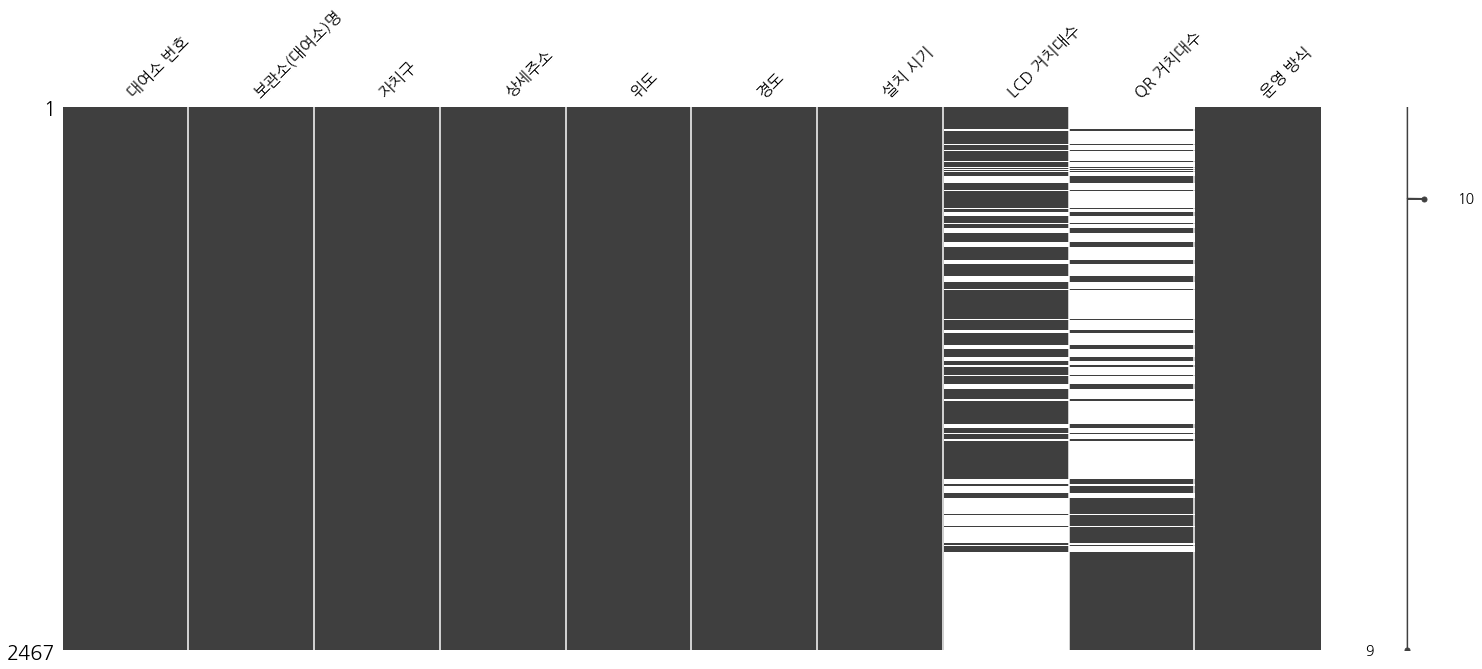

In [5]:
# 결측치 확인

import missingno as msno
msno.matrix(rental)

In [6]:
# 결측치 확인
rental.isna().sum()

대여소 번호          0
보관소(대여소)명       0
자치구             0
상세주소            0
위도              0
경도              0
설치 시기           0
LCD 거치대수     1013
QR 거치대수      1453
운영 방식           0
dtype: int64

In [7]:
rental = rental.fillna(0)
rental

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,0.0,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,0.0,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,0.0,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,0.0,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,0.0,LCD
...,...,...,...,...,...,...,...,...,...,...
2462,4864,송파사거리,송파구,송파구 송파동 97-2,37.502056,127.110550,2021-04-27,0.0,6.0,QR
2463,4865,한성백제역 1번출구 뒤,송파구,송파구 방이동 45-4,37.516342,127.115593,2021-04-28,0.0,5.0,QR
2464,4867,가락대림아파트 앞,송파구,송파구 가락동 94-9,37.500027,127.118431,2021-04-28,0.0,10.0,QR
2465,4868,레이크 호텔 앞,송파구,송파구 석촌동 158,37.507172,127.101242,2021-05-18,0.0,7.0,QR


In [8]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소 번호     2467 non-null   int64  
 1   보관소(대여소)명  2467 non-null   object 
 2   자치구        2467 non-null   object 
 3   상세주소       2467 non-null   object 
 4   위도         2467 non-null   float64
 5   경도         2467 non-null   float64
 6   설치 시기      2467 non-null   object 
 7   LCD 거치대수   2467 non-null   float64
 8   QR 거치대수    2467 non-null   float64
 9   운영 방식      2467 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 192.9+ KB


In [9]:
rental['LCD 거치대수'] = rental['LCD 거치대수'].astype(int)

In [10]:
rental['QR 거치대수'] = rental['QR 거치대수'].astype(int)

In [11]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소 번호     2467 non-null   int64  
 1   보관소(대여소)명  2467 non-null   object 
 2   자치구        2467 non-null   object 
 3   상세주소       2467 non-null   object 
 4   위도         2467 non-null   float64
 5   경도         2467 non-null   float64
 6   설치 시기      2467 non-null   object 
 7   LCD 거치대수   2467 non-null   int32  
 8   QR 거치대수    2467 non-null   int32  
 9   운영 방식      2467 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 173.6+ KB


In [12]:
rental.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20,0,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14,0,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13,0,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5,0,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10,0,LCD


In [13]:
rental.tail()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
2462,4864,송파사거리,송파구,송파구 송파동 97-2,37.502056,127.110550,2021-04-27,0,6,QR
2463,4865,한성백제역 1번출구 뒤,송파구,송파구 방이동 45-4,37.516342,127.115593,2021-04-28,0,5,QR
2464,4867,가락대림아파트 앞,송파구,송파구 가락동 94-9,37.500027,127.118431,2021-04-28,0,10,QR
2465,4868,레이크 호텔 앞,송파구,송파구 석촌동 158,37.507172,127.101242,2021-05-18,0,7,QR
2466,4869,잠실나들목6,송파구,잠실동 24,37.516296,127.084610,2021-06-21,0,9,QR


In [14]:
rental['거치대수'] = rental['LCD 거치대수'] + rental['QR 거치대수']
rental.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식,거치대수
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20,0,LCD,20
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14,0,LCD,14
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13,0,LCD,13
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5,0,LCD,5
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10,0,LCD,10


In [15]:
rental.describe()

,대여소 번호,위도,경도,LCD 거치대수,QR 거치대수,거치대수
count,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,1965.064856,37.532988,126.940433,7.462100,4.955006,12.417106
std,1335.056455,0.757753,2.558402,7.194697,6.681978,4.744904
min,102.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,845.500000,37.506330,126.916916,0.000000,0.000000,10.000000
50%,1713.000000,37.547070,127.003761,10.000000,0.000000,10.000000
75%,2744.500000,37.577787,127.063034,10.000000,10.000000,15.000000
max,4869.000000,37.691013,127.180641,40.000000,40.000000,40.000000


# 1. 따릉이 대여소 위치 시각화

In [16]:
bike_map = folium.Map(location = [rental['위도'].mean(), rental['경도'].mean()], zoom_start = 11, tiles='CartoDB positron')

for i, row in rental.iterrows():
    folium.CircleMarker(location = [row['위도'], row['경도']], radius = 1, fill = True).add_to(bike_map)
    
bike_map

#### 히트맵으로 대여소 밀집도 확인

In [17]:
bike_map = folium.Map(location = [rental['위도'].mean(), rental['경도'].mean()], zoom_start = 11, tiles = 'CartoDB positron')
plugins.HeatMap(rental[['위도', '경도']].values.tolist(), radius = 10, blur = 5).add_to(bike_map)
plugins.Fullscreen(positions = 'topright').add_to(bike_map)
bike_map

# 2. 지역구 중심으로 살펴보기

## 2.1 대여소 개수 확인

<function matplotlib.pyplot.show(*args, **kw)>

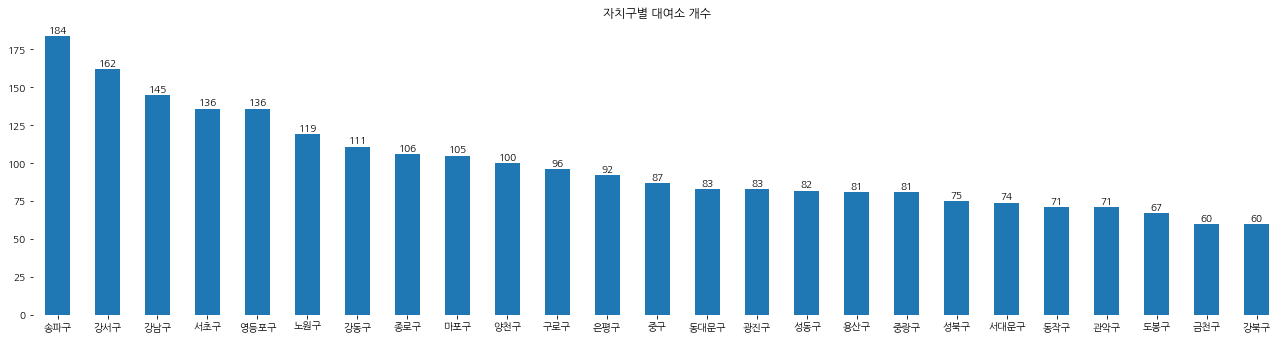

In [18]:
have_bikes = rental.groupby('자치구').size()
have_bikes.sort_values(ascending = False, inplace = True)

ax = have_bikes.plot(kind = 'bar', figsize = (18, 5), rot = 0, title = '자치구별 대여소 개수')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate('%d'%(height), (left+width/2, height+2), ha = 'center')
    
plt.box(False)
plt.xlabel(' ')
plt.tight_layout()
plt.show

가장 많은 곳(송파구 184개)과 가장 적은 곳(강북구 60개)의 차이가 약 3배

In [19]:
bike_map = folium.Map(location = [rental['위도'].mean(), rental['경도'].mean()], zoom_start = 11, tiles = 'CartoDB positron')
folium.Choropleth(geo_str, data = have_bikes, key_on = 'feature.properties.SIG_KOR_NM', fill_color = 'Blues').add_to(bike_map)
bike_map

- 색이 진할수록 대여소 개수가 많은 지역
- 강남3구(송파, 강남, 서초)와 강서(강서, 영등포) 지역이 대여소가 많은 것을 알 수 있음

## 2.2 지역별 대여소당 평균 거치대수 비교

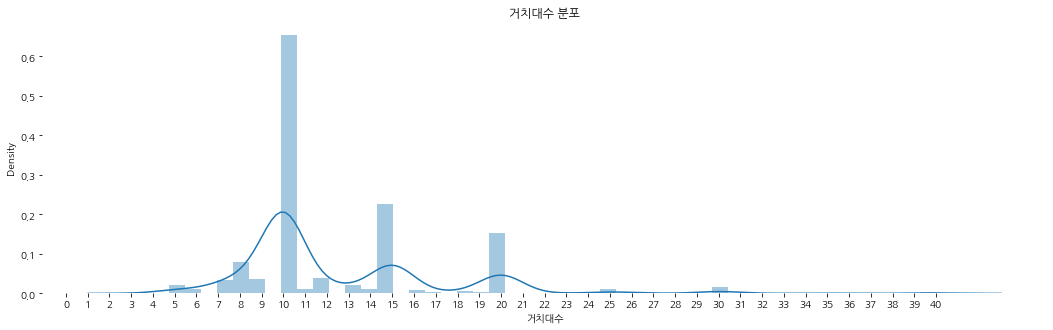

In [20]:
plt.figure(figsize = (18, 5))
sns.distplot(rental['거치대수'])
plt.title('거치대수 분포')
plt.xticks(range(0, 41))
plt.box(False)
plt.show()

- 일반적으로 대여소 1곳당 거치대수가 10개인 곳이 가장 많음
- 그 다음으로는 15개, 20개
- 40개인 곳도 있음

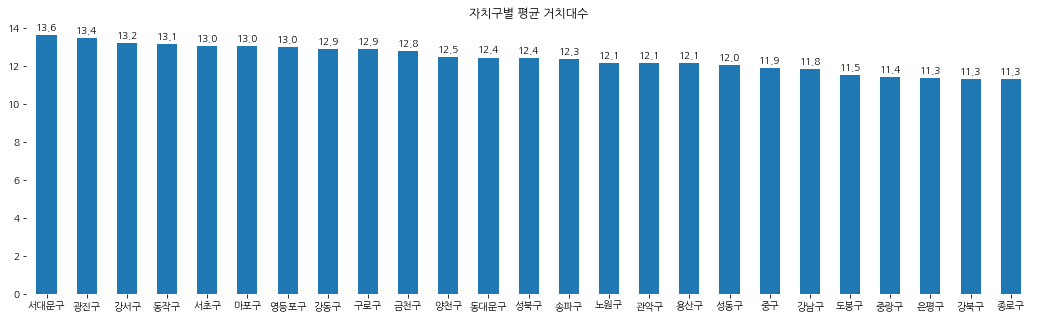

In [21]:
bike_rental = rental.groupby('자치구')['거치대수'].sum()
bike_rental = bike_rental / have_bikes
bike_rental.sort_values(ascending = False, inplace = True)

ax = bike_rental.plot(kind = 'bar', figsize = (18, 5), rot = 0, title = '자치구별 평균 거치대수')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate('%.1f'%(height), (left+width/2, height + 0.3), ha = 'center')
    
plt.box(False)
plt.xlabel('')
plt.show()

- 자치구별 평균 거치대수는 11 ~ 14 사이로 큰 차이가 있지는 않음
- 위에서 송파구는 대여소 갯수가 184개로 가장 많은 반면, 강북구는 60개로 가장 적었음
- 하지만 여기서 보면 평균 거치대수는 송파구는 12.3, 강북구는 11.3으로 차이가 크지 않음

In [22]:
bike_map = folium.Map(location = [rental['위도'].mean(), rental['경도'].mean()], zoom_start = 11, tiles = 'CartoDB positron')
folium.Choropleth(geo_str, data = bike_rental, key_on = 'feature.properties.SIG_KOR_NM', fill_color = 'Blues').add_to(bike_map)
bike_map

- 자치구별 대여소의 평균 거치대수 역시 색이 진할수록 값이 큼
- 서대문구, 광진구의 대여소별 평균 거치대수가 많음
- 강서구, 서초구, 영등포구의 경우에는 대여소 수도 많았는데, 평균 거치대 수도 많음. 즉, 따릉이가 많이 배치되어 있음
- 반면, 도봉구, 강북구는 대여소 수도 적었는데, 평균 거치대 수도 적음. 즉, 따릉이가 적게 배치되어 있음
- 금천구의 경우에는 대여소 수는 적었는데 비해, 평균 거치대 수는 많은 편. 즉, 한 대여소에 많은 따릉이가 배치되어 있음

## 2.3 가장 가까운 대여소간 평균 거리는?

- 하나의 대여소와 가장 가까운 대여소의 거리들의 평균 확인
- 대여소가 모여 있다면 평균 거리는 작을 것이고 흩어져 있다면 평균 거리는 큼
- 먼저, 각 자치구별, 가장 가까운 대여소간 거리 분포 확인

In [23]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    calculate the great circle distance between two points on the earth(specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    m = 1000 * km
    return m

In [24]:
dict_dists = {}

for name, df in rental.groupby('자치구'):
    dists = []
    for i, i_row in df.iterrows():
        min_dist = float('INF')
        
        for j, j_row in df.iterrows():
            if i == j:
                continue
            distance = haversine(i_row['경도'], i_row['위도'], j_row['경도'], j_row['위도'])
            min_dist = distance if distance < min_dist else min_dist
            
        dists.append(min_dist)
    dict_dists[name] = dists

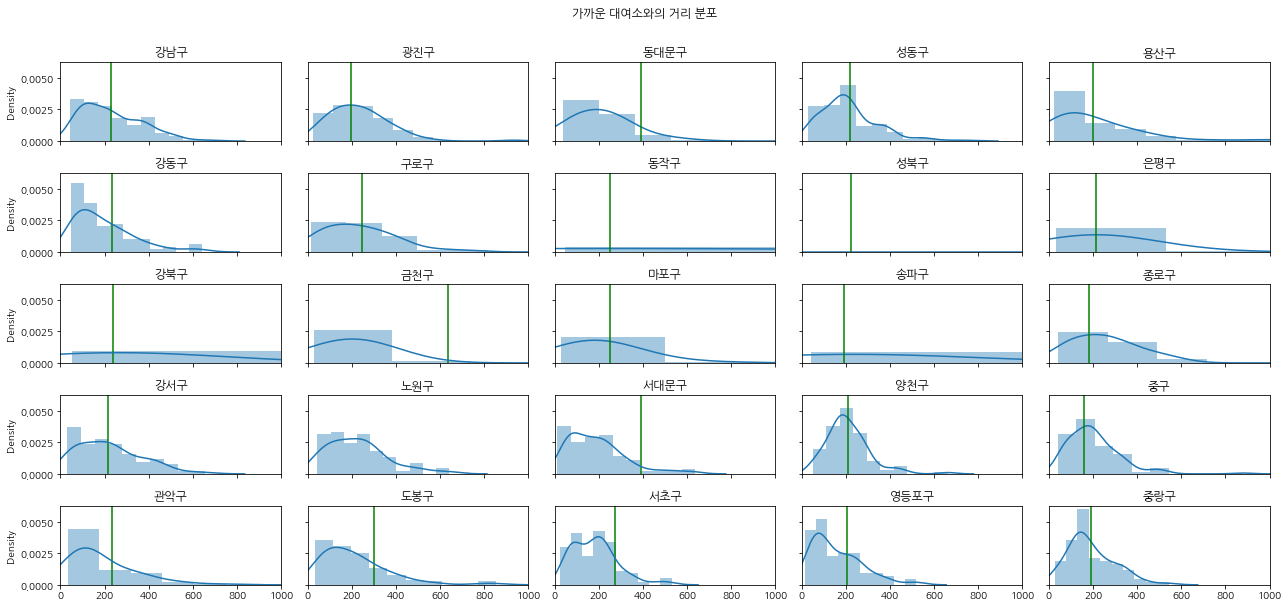

In [25]:
fig, axes = plt.subplots(5, 5, figsize = (18, 8), sharex = True, sharey = True)

i, j = 0, 0
for name, dists in dict_dists.items():
    sns.distplot(dists, ax = axes[i][j], bins = 10)
    axes[j][i].set_title(name)
    axes[j][i].axvline(np.array(dists).mean(), color = 'green')
    j += 1
    if j >= 5:
        i += 1
        j = 0
        
fig.suptitle('가까운 대여소와의 거리 분포', y = 1.05)
plt.xlim(0, 1000)
fig.tight_layout()
plt.show()

- 초록색 선은 각 자치구별 평균 거리
- 가장 가까운 대여소간 거리는 대부분 200~400m
- 강남구, 서초구, 송파구 대여소 분포를 지도에서 확인

In [26]:
gangnam = rental[rental['자치구'] == '강남구']

bike_map = folium.Map(location = [gangnam['위도'].mean(), gangnam['경도'].mean()], zoom_start = 13)
for i, row in gangnam.iterrows():
    folium.CircleMarker(location = [row['위도'], row['경도']], radius = 5, fill = True).add_to(bike_map)

plugins.HeatMap(gangnam[['위도', '경도']].values.tolist()).add_to(bike_map)
bike_map

- 강남구의 경우에는 자전거 대여소들이 대체로 밀집되어 있다
- 코엑스 인근이 가장 많음

In [27]:
seocho = rental[rental['자치구'] == '서초구']

bike_map = folium.Map(location = [seocho['위도'].mean(), seocho['경도'].mean()], zoom_start = 13)
for i, row in seocho.iterrows():
    folium.CircleMarker(location = [row['위도'], row['경도']], radius = 5, fill = True).add_to(bike_map)

plugins.HeatMap(seocho[['위도', '경도']].values.tolist()).add_to(bike_map)
bike_map

- 서초구의 경우 반포고속터미널 인근과, 강남, 교대역 인근이 많다

In [28]:
songpa = rental[rental['자치구'] == '송파구']

bike_map = folium.Map(location = [songpa['위도'].mean(), songpa['경도'].mean()], zoom_start = 13)
for i, row in songpa.iterrows():
    folium.CircleMarker(location = [row['위도'], row['경도']], radius = 5, fill = True).add_to(bike_map)

plugins.HeatMap(songpa[['위도', '경도']].values.tolist()).add_to(bike_map)
bike_map

- 송파구의 경우 장지역,문정역 근처인 문정동과 가락시장역 근처와, 잠실역과 롯데월드몰이 있는 잠실동에 밀집되어 있음

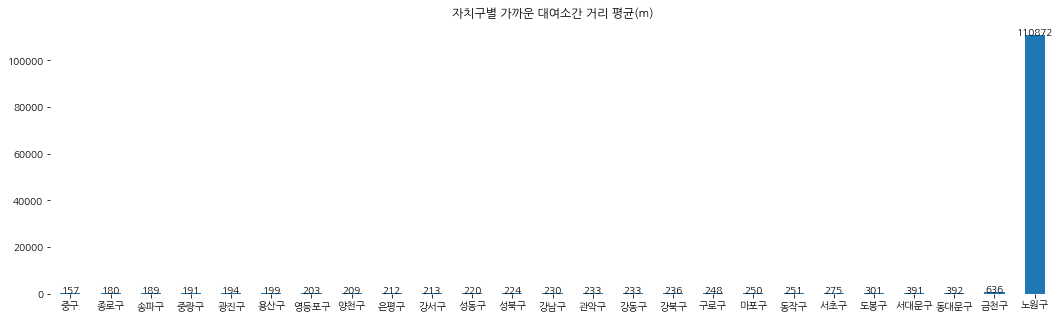

In [29]:
dist_means = {name: np.mean(dists) for name, dists in dict_dists.items()}
dist_means = pd.Series(dist_means)
dist_means.sort_values(inplace = True)

ax = dist_means.plot(kind = 'bar', figsize = (18, 5), rot = 0, legend = False, title = '자치구별 가까운 대여소간 거리 평균(m)')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate('%d'%(height), (left+width/2, height+10), ha = 'center')
plt.box(False)
plt.show()

In [31]:
dist_means

중구         157.259246
종로구        180.899253
송파구        189.974149
중랑구        191.855794
광진구        194.859077
용산구        199.338635
영등포구       203.811291
양천구        209.038143
은평구        212.483520
강서구        213.841085
성동구        220.253471
성북구        224.517515
강남구        230.413799
관악구        233.073549
강동구        233.115494
강북구        236.830477
구로구        248.808537
마포구        250.867479
동작구        251.799893
서초구        275.291767
도봉구        301.317347
서대문구       391.550874
동대문구       392.176249
금천구        636.521186
노원구     110872.363544
dtype: float64

- 노원구에 뭔가 오류가 있는 듯함. 왜 그렇지???
- 자치구별 대여소 평균거리는 150m ~ 650m 사이
- 보통 200m에서 300m이내 인 듯 함.
- 대여소가 가장 많았던 송파구는 대여소간 평균 거리도 짧음

In [30]:
bike_map = folium.Map(location = [rental['위도'].mean(), rental['경도'].mean()], zoom_start = 11, tiles = 'CartoDB positron')
folium.Choropleth(geo_str, data = dist_means, key_on = 'feature.properties.SIG_KOR_NM', fill_color = 'Blues').add_to(bike_map)
bike_map